In [45]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score
import time
import pandas as pd

In [18]:
digits = load_digits()

X = digits.data
y = digits.target

In [ ]:
print(digits.DESCR)

# La taille du dataset est de 5620
# Le nombre de classes et de 10
# Le nombre d'attributs est de 64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
classifier_k3 = KNeighborsClassifier(3)

classifier_k3.fit(X_train, y_train)

y_pred_k3 = classifier_k3.predict(X_test)

recall_k3 = recall_score(y_test, y_pred_k3, average='macro')
precision_k3 = precision_score(y_test, y_pred_k3, average='macro')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [52]:
Ks = [1, 3, 5, 7, 9]
recalls = []
precisions = []
execution_times = []

for k in Ks:
    start_time = time.time()
    classifier = KNeighborsClassifier(k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    execution_times.append(time.time() - start_time)

In [53]:
d = {'K': Ks, 'Recall': recalls, 'Precision': precisions, 'Execution_Time': execution_times}
df = pd.DataFrame(data=d)
df

,K,Recall,Precision,Execution_Time
0,1,0.983839,0.985665,0.140625
1,3,0.982084,0.983728,0.122672
2,5,0.980418,0.982186,0.139627
3,7,0.984913,0.985140,0.124687
4,9,0.986668,0.987114,0.133223


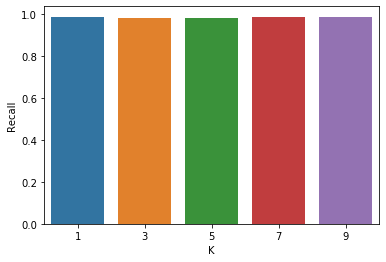

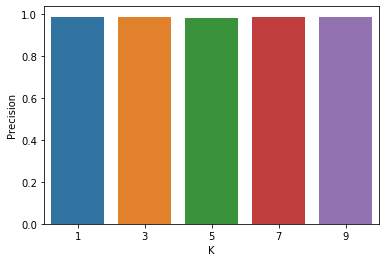

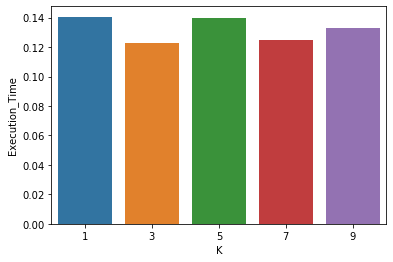

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='K', y='Recall')
plt.show()
sns.barplot(data=df, x='K', y='Precision')
plt.show()
sns.barplot(data=df, x='K', y='Execution_Time')
plt.show()